# Pokemon Analysis

### Table of Contents
1. [Analysis](##analysis)
2. [Generation](##generation)
3. [Type](##type)
4. [Height & Weight](##height-&-weight)
5. [Gender Encounter Rate](##gender-encounter-rate)
6. [Get Rate](##get-rate)
7. [Stats](#stats-on-pokemon)

### Summary of Analysis


## Analysis

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import seaborn as sns
import os
from brokenaxes import brokenaxes
from scipy.stats import levene
from scipy.stats import kruskal
from scipy.stats import bootstrap
import scikit_posthocs as sp

In [4]:
# Create a dataframe from the csv file saved in the data folder
df = pd.read_csv('data/Pokedex_Ver_SV2.csv')

# Create a dataframe with the unique number of pokemon (merging forms)
pokedex = df.drop_duplicates(subset=['Original_Name'], keep='first').copy()

# Count the number of unique pokemon
count_pokedex = pokedex['Original_Name'].count()

# Create a dataframe with all of the pokemon
national_dex = df.copy()

# Count the number of pokemon in national_dex
count_national_dex = national_dex['Original_Name'].count()

# pokedex.head()
# national_dex.head()

print(f'Number of unique pokemon in the pokedex:{count_pokedex}')
print(f'Number of pokemon in the national dex: {count_national_dex}')

Number of unique pokemon in the pokedex:1010
Number of pokemon in the national dex: 1203


## Generation
* Mode
* Bar Chart of each generation
* ~~Comparision of same type of pokemon across generations (t-test); Create a dataframe that has the 1 generation and the last generation released~~

In [3]:
# How many pokemon are in genderation 5
gen5 = pokedex[pokedex['Generation'] == 5]
count_gen5 = gen5['Original_Name'].count()
print(f'Number of pokemon in generation 5: {count_gen5}')

Number of pokemon in generation 5: 156


## Type
* Percentage, frequencies, bar chart - How many are in each type?
* Create column to combine type 1 and type 2 columns (alphabetical order on combination)
* Bar chart of each type combination
* Focus on sections of the data that are interesting
* Which combinations are missing or not well represented?
* Which combinations are the most frequent?

## Height & Weight
* Scatterplot, with regression line (correlation)
* Point out outliers if they exist
* Using gender as a grouping variable for scatterplot

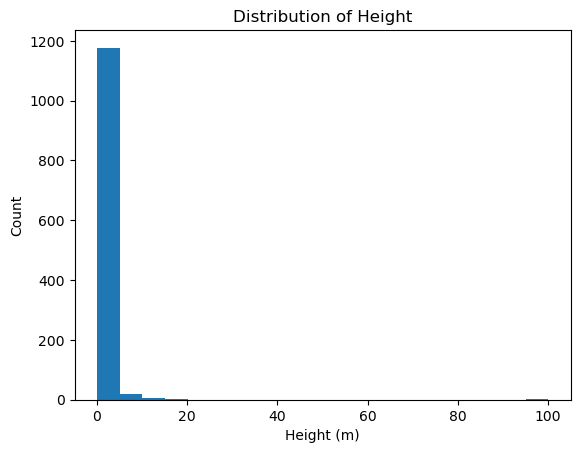

In [4]:
# Distribution of Height
plt.hist(national_dex['Height'], bins=20)
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.title('Distribution of Height')
plt.show()

[Text(0.5, 0, 'Height (m)'), Text(0.5, 1.0, 'Box Plot of Height')]

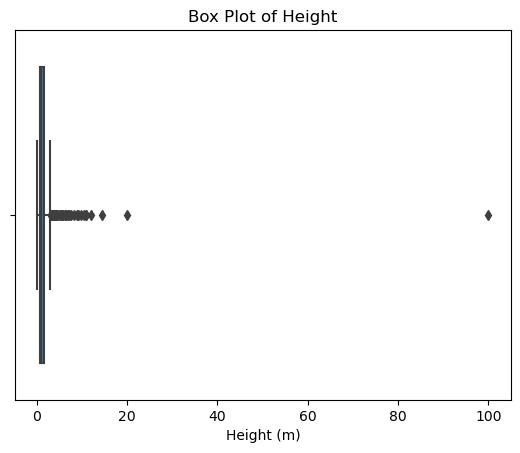

In [5]:
# Box plot of Height
height_boxplot = sns.boxplot(x=national_dex['Height'])
height_boxplot.set(xlabel='Height (m)', title='Box Plot of Height')

In [33]:
# There appears to be one clear outlier on height
# Create a dataframe that excludes the outlier
national_dex_no_outlier = national_dex[national_dex['Height'] < 90]
whats_the_new_max_height = national_dex_no_outlier['Height'].max()
# whats_the_new_max_height

# Height is positively skewed so median would be a better measure of central tendency
# Median height of pokemon
median_height = national_dex_no_outlier['Height'].median()
sd_height = national_dex_no_outlier['Height'].std()
print(f"Median Height: {median_height}")
print(f"Standard Deviation of Height: {sd_height}")

Median Height: 1.0
Standard Deviation of Height: 1.3816267533606852


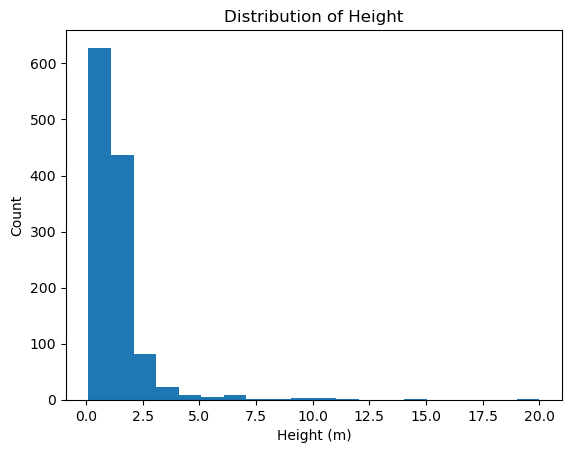

In [7]:
# Revised distribution of Height
plt.hist(national_dex_no_outlier['Height'], bins=20)
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.title('Distribution of Height')
plt.show()

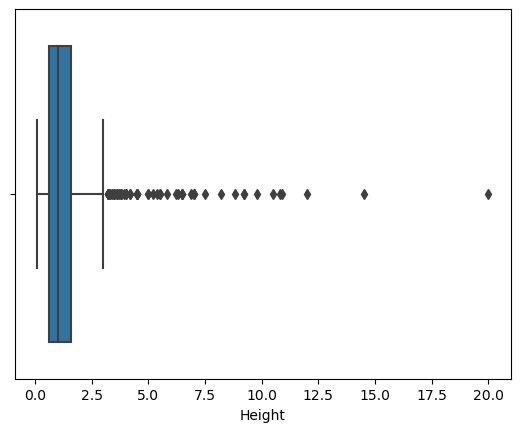

In [8]:
# Still skewed, but better!
# Box plot of Height
height_boxplot = sns.boxplot(x=national_dex_no_outlier['Height'])

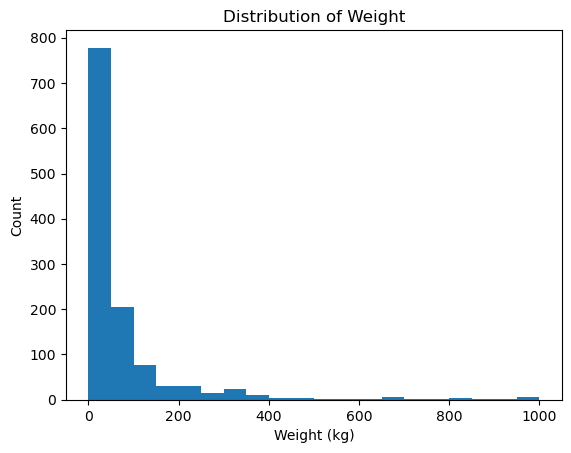

In [9]:
# Distribution of Weight
plt.hist(national_dex_no_outlier['Weight'], bins=20)
plt.xlabel('Weight (kg)')
plt.ylabel('Count')
plt.title('Distribution of Weight')
plt.show()

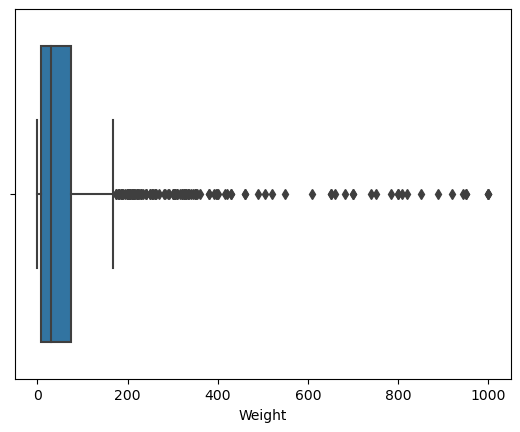

In [10]:
# Box plot of Weight
weight_boxplot = sns.boxplot(x=national_dex_no_outlier['Weight'])

# There are some potential outliers, but they are all near each other so it is reasonable to keep them

In [32]:
# Weight is positively skewed so median would be a better measure of central tendency
# Median weight of pokemon
median_weight = national_dex_no_outlier['Weight'].median()
sd_weight = national_dex_no_outlier['Weight'].std()
print(f"Median Weight: {median_weight}")
print(f"Standard Deviation of Weight: {sd_weight}")

Median Weight: 30.0
Standard Deviation of Weight: 132.79277231470144


In [12]:
# Height and Weight is skewed, so Spearman's rho would be better than Pearsons
corr, pval = spearmanr(national_dex_no_outlier['Height'], national_dex_no_outlier['Weight'])
print(f"Spearman's rho: {corr}")
print(f"P-value: {pval}")

# There is a strong positive correlation between height and weight

Spearman's rho: 0.844481710264344
P-value: 0.0


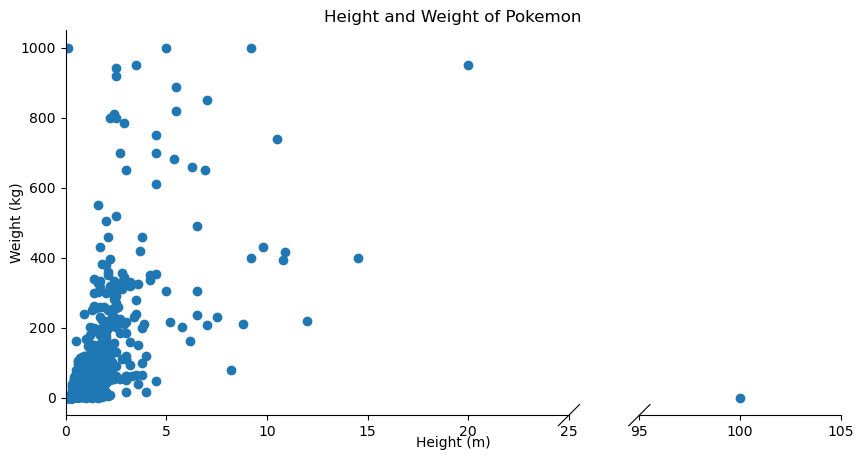

In [56]:
# Create a figure using brokenaxes to zoom in on the majority of the data
fig = plt.figure(figsize=(10, 5))
bax = brokenaxes(xlims=((0, 25), (95, 105)), hspace=.05)
bax.scatter(x='Height', y='Weight', data=national_dex)
bax.set_xlabel('Height (m)')
bax.set_ylabel('Weight (kg)')
bax.set_title('Height and Weight of Pokemon')
plt.show()

In [58]:
# Which pokemon has a height between 95 and 105 meters?
tall_pokemon = national_dex[national_dex['Height'] > 95]
tall_pokemon

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
1067,890,890_1,Eternatus,Eternamax Eternatus,8,100.0,0.0,Poison,Dragon,Pressure,...,125,250,130,1125,3,0,0,0,0,0


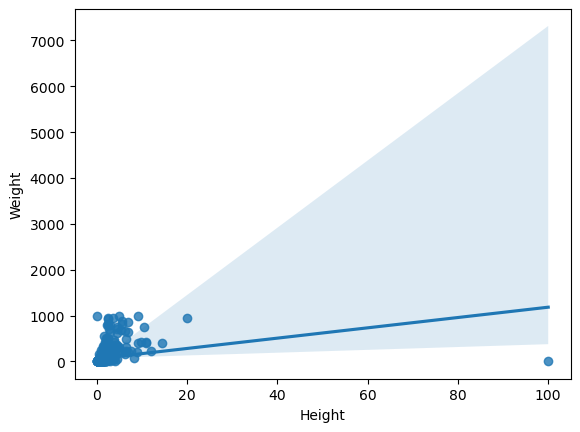

In [47]:
# Create a scatterplot of height vs weight
height_by_weight = sns.regplot(x='Height', y='Weight', data=national_dex)

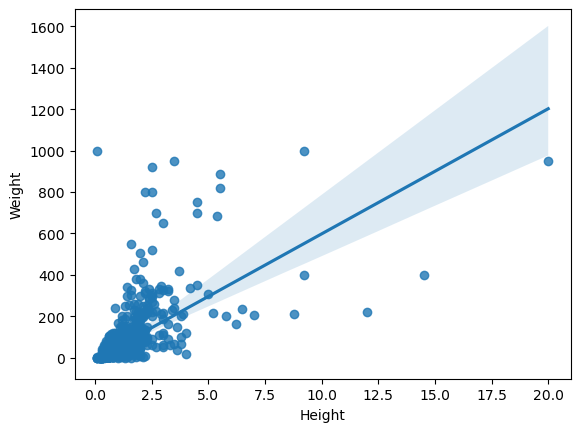

In [14]:
# Create a scatterplot of height vs weight
height_by_weight = sns.regplot(x='Height', y='Weight', data=pokedex)

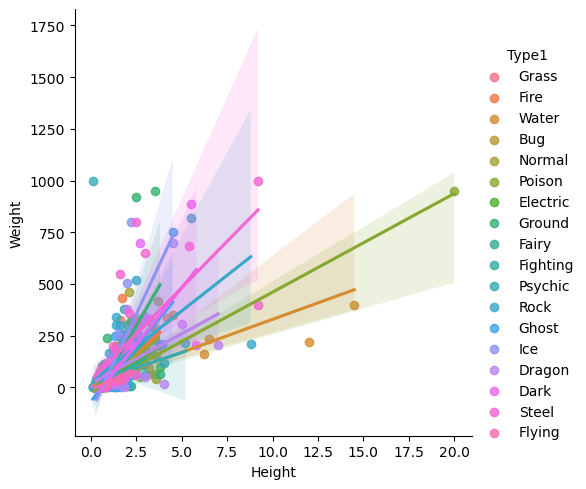

In [31]:
# Create a scatterplot of height vs weight
height_by_weight = sns.lmplot(x='Height', y='Weight', data=pokedex, hue='Type1')

## Gender Encounter Rate
* ~~Overlapping Normal plots?~~
* Check if the unique values are the same for gender encounter
* Add photos for the different encounter rates

In [15]:
# What are the unique combinations of Gender_Male, Gender_Female_, and Gender_Unknown?

# Select only the gender columns
gender_col = ["Gender_Male", "Gender_Female", "Gender_Unknown"]
unique_gender_rate = national_dex.loc[:, gender_col].copy()

# Sort the columns
unique_gender_rate = unique_gender_rate.sort_values(by=["Gender_Female"])

# Create a column that concatenates the gender rates
unique_gender_rate['Gender_Combination'] = unique_gender_rate.apply(lambda row: "M: " + str(row["Gender_Male"]) + ", F: " + str(row["Gender_Female"]) + ", U: " + str(row["Gender_Unknown"]), axis=1)

# How many unique combinations of the Gender_Combination column
num_unique_gender_rate = unique_gender_rate.groupby('Gender_Combination').size()

num_unique_gender_rate

# This information can be used to create a figure in excel

Gender_Combination
M: 0.0, F: 0.0, U: 100.0    196
M: 0.0, F: 100.0, U: 0.0     46
M: 100.0, F: 0.0, U: 0.0     37
M: 12.5, F: 87.5, U: 0.0      2
M: 25.0, F: 75.0, U: 0.0     31
M: 50.0, F: 50.0, U: 0.0    724
M: 75.0, F: 25.0, U: 0.0     22
M: 87.5, F: 12.5, U: 0.0    145
dtype: int64

## Get Rate
* mean, median, standard deviation
* Histogram, boxplot, normal plot
* Which pokemon have the highest and lowest catch rates?

In [35]:
# Find the mean, median, and standard deviation for Get_Rate
mean_get_rate = national_dex['Get_Rate'].mean()
median_get_rate = national_dex['Get_Rate'].median()
std_get_rate = national_dex['Get_Rate'].std()

# Print the results
print(f"Mean Get Rate: {mean_get_rate}")
print(f"Median Get Rate: {median_get_rate}")
print(f"Standard Deviation of Get Rate: {std_get_rate}")

Mean Get Rate: 93.27431421446384
Median Get Rate: 60.0
Standard Deviation of Get Rate: 76.13470785843913


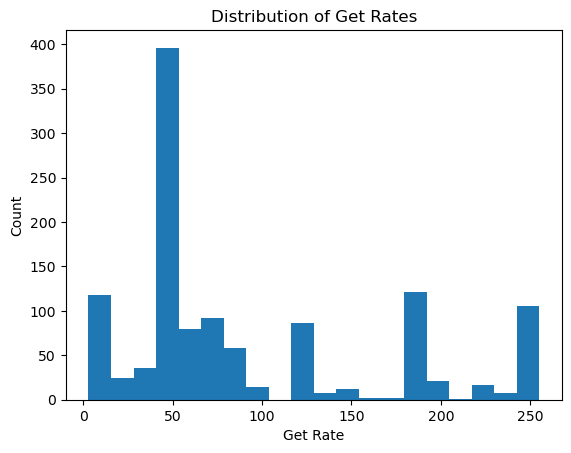

In [46]:
# Create a distribution plot of Get_Rate
plt.hist(national_dex['Get_Rate'], bins=20)
plt.xlabel('Get Rate')
plt.ylabel('Count')
plt.title('Distribution of Get Rates')
plt.show()

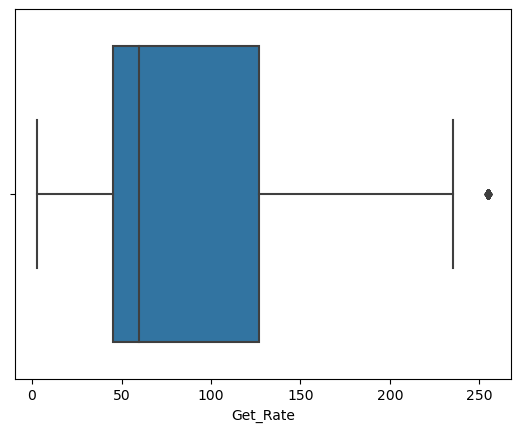

In [17]:
# Create a boxplot of Get_Rate
get_rate_boxplot = sns.boxplot(x=national_dex['Get_Rate'])

In [42]:
# Find the top 5 pokemon with the highest Get_Rate
top_5_get_rate = national_dex.sort_values(by=['Get_Rate'], ascending=False).head(20)

# Limit the columns to be only the names and Get_Rate
top_5_get_rate = top_5_get_rate[['Original_Name', 'Name', 'Get_Rate']]

top_5_get_rate



,Original_Name,Name,Get_Rate
246,Wooper,Paldean Wooper,255
633,Pidove,Pidove,255
658,Venipede,Venipede,255
655,Sewaddle,Sewaddle,255
1067,Eternatus,Eternamax Eternatus,255
650,Tympole,Tympole,255
1066,Eternatus,Eternatus,255
646,Audino,Mega Audino,255
645,Audino,Audino,255
638,Roggenrola,Roggenrola,255


In [ ]:
# How many Pokemon have a catch rate of 255?
num_255_catch_rate = national_dex[national_dex['Get_Rate'] == 255]['Get_Rate'].count()
print(f"Number of Pokemon with a catch rate of 255: {num_255_catch_rate}")

In [45]:
# Find the bottom 5 pokemon with the lowest Get_Rate
bottom_5_get_rate = national_dex.sort_values(by=['Get_Rate'], ascending=True).head(20)

# Limit the columns to be only the names and Get_Rate
bottom_5_get_rate = bottom_5_get_rate[['Original_Name', 'Name', 'Get_Rate']]

bottom_5_get_rate

,Original_Name,Name,Get_Rate
773,Thundurus,Thundurus Incarnate Form,3
786,Genesect,Genesect,3
867,Zygarde,Zygarde 50% Form,3
868,Zygarde,Zygarde 10% Form,3
869,Zygarde,Zygarde Complete Form,3
870,Diancie,Diancie,3
871,Diancie,Mega Diancie,3
872,Hoopa,Confined Hoopa,3
873,Hoopa,Unbound Hoopa,3
874,Volcanion,Volcanion,3


In [44]:
# How many Pokemon have a catch rate of 3?
num_3_catch_rate = national_dex[national_dex['Get_Rate'] == 3]['Get_Rate'].count()
print(f"Number of Pokemon with a catch rate of 3: {num_255_catch_rate}")

Number of Pokemon with a catch rate of 3: 106


### ANOVA

In [59]:
# Create a dataframe with only the columns needed for ANOVA
get_rate_anova_df = national_dex[['Get_Rate', 'Category']].copy()

# How many categories are there? 
num_categories = get_rate_anova_df.groupby('Category').size()
print(f"Number of Categories: {num_categories}")
# There is at least 30 in each category


Number of Categories: Category
Legendary           46
Mythical            30
Ordinary          1050
Semi-Legendary      77
dtype: int64


In [62]:
get_rate_groups = get_rate_anova_df.groupby('Category')
group_vals = [group[1]['Get_Rate'].values for group in get_rate_groups]

stats, pval = levene(*group_vals)

print(f"Levene's Test: {stats}")
print(f"P-value: {pval}")

Levene's Test: 26.390501224981648
P-value: 1.5664040034067266e-16


In [66]:
kruskal(df['Get_Rate'][df['Category']=="Legendary"], 
        df['Get_Rate'][df['Category']=="Mythical"],
        df['Get_Rate'][df['Category']=="Ordinary"],
        df['Get_Rate'][df['Category']=="Semi-Legendary"])

KruskalResult(statistic=292.87996629279303, pvalue=3.4568744321255117e-63)

In [67]:
# Find degrees of freedom for the ANOVA
num_groups = len(get_rate_groups)
num_obs = len(get_rate_anova_df)
df_between = num_groups - 1
df_within = num_obs - num_groups
df_total = num_obs - 1
print(f"Degrees of Freedom Between: {df_between}")
print(f"Degrees of Freedom Within: {df_within}")
print(f"Degrees of Freedom Total: {df_total}")

Degrees of Freedom Between: 3
Degrees of Freedom Within: 1199
Degrees of Freedom Total: 1202


In [74]:
# Post-hoc analysis will use Dunn's test which is also non-parametric
dunn_test = sp.posthoc_dunn(get_rate_anova_df, val_col='Get_Rate', group_col='Category', p_adjust='holm')
dunn_test = dunn_test.round(3)
print(dunn_test)

# Export the dunn_test to a csv file
dunn_test.to_csv('data/dunn_test.csv')

                Legendary  Mythical  Ordinary  Semi-Legendary
Legendary           1.000     0.146       0.0           0.146
Mythical            0.146     1.000       0.0           0.606
Ordinary            0.000     0.000       1.0           0.000
Semi-Legendary      0.146     0.606       0.0           1.000


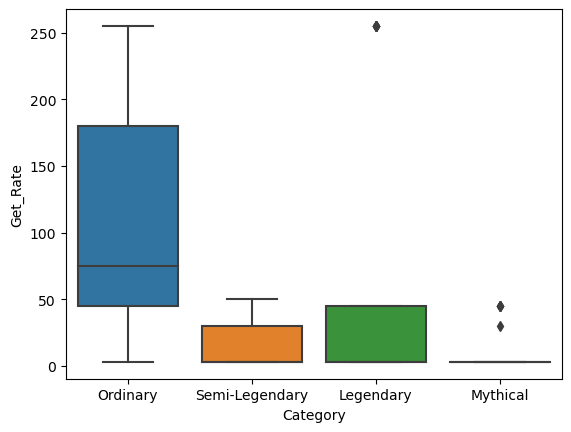

In [68]:
# Create a boxplot that can be used as a visual aid to the ANOVA
get_rate_boxplot = sns.boxplot(x='Category', y='Get_Rate', data=get_rate_anova_df)

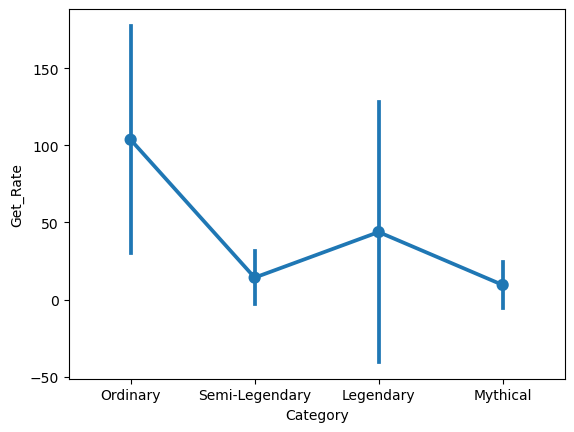

In [76]:
# Confidence Intervals would be better to show differences between the groups
sns.pointplot(x="Category", y="Get_Rate", data=get_rate_anova_df, errorbar="sd")
plt.show()

## Stats on Pokemon
* HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
* mean, median, mode, standard deviation
* Histogram, boxplot, normal plot
* Which pokemon have the highest and lowest for each?
* Correlation between stats